## Functions

### gaussian_kernel(): x
This function computes the Gaussian kernel with the given distance and lambda value.

### patch_distance(): 
This function computes the distance between the given patches.

### weighted_sum_patches(): x
This function computes the weighted sum of patches for the given patch using all patches in the image.

### 1st inpaint(): x
This is the main function that performs image inpainting using patch-wise NL-means filter. It uses the above functions to compute the inpainted image.

### 2nd inpaint(): 
This function performs image inpainting using patch-wise NL-means filter with separable Gaussian blur. It takes the input image, the binary mask, the lambda value, and the patch size as input, and returns the inpainted image as output.

### separable_gaussian_blur(): 
This function computes the weighted sum of patches for the given image using separable Gaussian blur. It takes the input image, the lambda value, and the patch size as input, and returns the weighted sum of patches for the given image as output.

### signal.convolve2d(): 
This function computes the convolution of the input arrays. It takes the input arrays, and the mode as input, and returns the convolution of the input arrays as output.



## Parameters:

### lambda_value: 
This parameter specifies the lambda value for the Gaussian kernel used to compute the weighted sum of patches. The lambda value is a measure of the decay rate of the Gaussian kernel, and it determines the standard deviation of the Gaussian kernel, which in turn determines the amount of blur applied to the patches. A smaller lambda value results in more blur and a smoother weighted sum of patches, while a larger lambda value results in less blur and a sharper weighted sum of patches.

### patch_size: 
This parameter specifies the size of the patches used for the patch-wise NL-means filter. The patch size determines the dimensions of the patches, which in turn determines the number of patches in the image and the amount of overlap between the patches. A smaller patch size results in more patches and more overlap, while a larger patch size results in fewer patches and less overlap.

### kernel: 
This parameter specifies the kernel used to compute the weighted sum of patches. the kernel is a Gaussian kernel, which is computed using the separable_gaussian_blur() function. The Gaussian kernel is a smoothing kernel that assigns lower weights to patches that are farther away from the current patch, and higher weights to patches that are closer to the current patch. This helps to preserve the local structure of the image while smoothing out noise and artifacts.

### mode: 
This parameter specifies the mode used for the convolution of the input arrays. the mode is set to 'same', which means that the convolution will have the same size as the input arrays. This ensures that the dimensions of the weighted sum of patches match the dimensions of the patches in the image, which allows the inpainted image to be reconstructed using the weighted sum of patches.


In [1]:
import numpy as np

# def gaussian_kernel(distance, lambda_value):
#     """
#     Compute the Gaussian kernel with the given distance and lambda value.

#     Parameters
#     ----------
#     distance : float
#         Distance between the input vectors.
#     lambda_value : float
#         Lambda value for the Gaussian kernel.

#     Returns
#     -------
#     float
#         Gaussian kernel with the given distance and lambda value.
#     """

#     # Compute the Gaussian kernel using the given distance and lambda value
#     return np.exp(-distance / (2 * lambda_value ** 2))

def patch_distance(patch1, patch2):
    """
    Compute the distance between the given patches.

    Parameters
    ----------
    patch1 : ndarray
        First patch.
    patch2 : ndarray
        Second patch.

    Returns
    -------
    float
        Distance between the given patches.
    """

    # Compute the Euclidean distance between the patches
    return np.sum((patch1 - patch2) ** 2)

# def weighted_sum_patches(image, patch, lambda_value, patch_size):
#     """
#     Compute the weighted sum of patches for the given patch using all patches in the image.

#     Parameters
#     ----------
#     image : ndarray
#         Input image.
#     patch : ndarray
#         Patch for which the weighted sum of patches is to be computed.
#     lambda_value : float
#         Lambda value for the Gaussian kernel.
#     patch_size : int
#         Size of the patches.

#     Returns
#     -------
#     ndarray
#         Weighted sum of patches for the given patch.
#     """

#     # Compute the dimensions of the image
#     ny, nx = image.shape

#     # Compute the number of patches in each direction
#     n_patches_x = nx // patch_size
#     n_patches_y = ny // patch_size

#     # Initialize the weighted sum of patches to zero
#     weighted_sum = np.zeros_like(patch)

#     # Loop over all patches
#     for i in range(n_patches_x):
#         for j in range(n_patches_y):
#             # Compute the starting and ending indices for the comparison patch
#             comp_start_x = i * patch_size
#             comp_end_x = comp_start_x + patch_size
#             comp_start_y = j * patch_size
#             comp_end_y = comp_start_y + patch_size

#             # Extract the comparison patch from the image
#             comp_patch = image[comp_start_y:comp_end_y, comp_start_x:comp_end_x]

#             # Compute the distance between the patch and the comparison patch
#             distance = patch_distance(patch, comp_patch)

#             # Compute the weight for the comparison patch using the Gaussian kernel
#             weight = gaussian_kernel(distance, lambda_value)

#             # Update the weighted sum of patches using the comparison patch and its weight
#             weighted_sum += weight * comp_patch

#     return weighted_sum / np.sum(weighted_sum)

# def inpaint(image, mask, lambda_value, patch_size):
#     """
#     Perform image inpainting using patch-wise NL-means filter.

#     Parameters
#     ----------
#     image : ndarray
#         Input image.
#     mask : ndarray
#         Binary mask indicating the masked regions in the image.
#     lambda_value : float
#         Lambda value for the Gaussian kernel.
#     patch_size : int
#         Size of the patches.

#     Returns
#     -------
#     ndarray
#         Inpainted image.
#     """

#     # Initialize the inpainted image with the masked regions set to the mean of the unmasked pixels in the input image
#     inpainted = image.copy()
#     inpainted[mask] = np.mean(image[~mask])

#     # Compute the dimensions of the image
#     ny, nx = image.shape

#     # Compute the number of patches in each direction
#     n_patches_x = nx // patch_size
#     n_patches_y = ny // patch_size

#     # Loop over all patches
#     for i in range(n_patches_x):
#         for j in range(n_patches_y):
#             # Compute the starting and ending indices for the current patch
#             curr_start_x = i * patch_size
#             curr_end_x = curr_start_x + patch_size
#             curr_start_y = j * patch_size
#             curr_end_y = curr_start_y + patch_size

#             # Extract the current patch from the image
#             curr_patch = image[curr_start_y:curr_end_y, curr_start_x:curr_end_x]

#             # Compute the weighted sum of patches for the current patch using all patches in the image
#             weighted_sum = weighted_sum_patches(image, curr_patch, lambda_value, patch_size)

#             # Update the inpainted image using the weighted sum of patches for the current patch
#             inpainted[curr_start_y:curr_end_y, curr_start_x:curr_end_x] = weighted_sum

#     return inpainted


In [2]:
from scipy import signal

def separable_gaussian_blur(image, lambda_value, patch_size):
    """
    Compute the weighted sum of patches for the given image using separable Gaussian blur.

    Parameters
    ----------
    image : ndarray
        Input image.
    lambda_value : float
        Lambda value for the Gaussian kernel.
    patch_size : int
        Size of the patches.

    Returns
    -------
    ndarray
        Weighted sum of patches for the given image.
    """

    # Compute the dimensions of the image
    ny, nx = image.shape

    # Compute the standard deviation of the Gaussian kernel from the lambda value
    sigma = patch_size / lambda_value

    # Create the 1D Gaussian kernel for the rows
    row_kernel = np.exp(-np.arange(-patch_size, patch_size + 1) ** 2 / (2 * sigma ** 2))
    row_kernel /= np.sum(row_kernel)

    # Create the 1D Gaussian kernel for the columns
    col_kernel = np.exp(-np.arange(-patch_size, patch_size + 1) ** 2 / (2 * sigma ** 2))
    col_kernel /= np.sum(col_kernel)

    # Compute the weighted sum of patches for the image using separable Gaussian blur
    weighted_sum = signal.convolve2d(image, row_kernel[:, None], mode='same')
    weighted_sum = signal.convolve2d(weighted_sum, col_kernel[:, None], mode='same')

    return weighted_sum

                        
def inpaint(image, mask, lambda_value, patch_size):
    """
    Perform image inpainting using patch-wise NL-means filter with separable Gaussian blur.

    Parameters
    ----------
    image : ndarray
        Input image.
    mask : ndarray
        Binary mask indicating the masked regions in the image.
    lambda_value : float
        Lambda value for the Gaussian kernel.
    patch_size : int
        Size of the patches.

    Returns
    -------
    ndarray
        Inpainted image.
    """

    # Initialize the inpainted image with the masked regions set to the mean of the unmasked pixels in the input image
    inpainted = image.copy()
    inpainted[mask] = np.mean(image[np.logical_not(mask)])

    # Compute the dimensions of the image
    ny, nx = image.shape

    # Compute the number of patches in each direction
    n_patches_x = nx // patch_size
    n_patches_y = ny // patch_size

    # Loop over all patches
    for i in range(n_patches_x):
        for j in range(n_patches_y):
            # Compute the starting and ending indices for the current patch
            curr_start_x = i * patch_size
            curr_end_x = curr_start_x + patch_size
            curr_start_y = j * patch_size
            curr_end_y = curr_start_y + patch_size

            # Extract the current patch from the image
            curr_patch = image[curr_start_y:curr_end_y, curr_start_x:curr_end_x]

            # Compute the weighted sum of patches for the current patch using separable Gaussian blur
            weighted_sum = separable_gaussian_blur(curr_patch, lambda_value, patch_size)


            # Update the inpainted image using the weighted sum of patches for the image
            inpainted[curr_start_y:curr_end_y, curr_start_x:curr_end_x] = weighted_sum

    return inpainted

(1200, 1920)


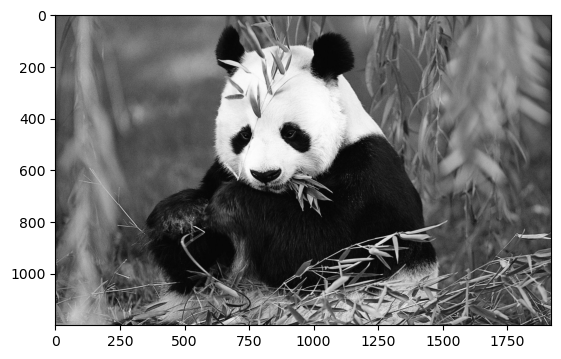

[[ 79.8443  66.8456  71.1441 ...  86.7634  38.7682  62.7658]
 [ 90.8432  82.844   80.268  ...  71.7649  70.765   61.7659]
 [ 93.9569  76.6705  79.909  ...  57.7663  77.7643  63.7657]
 ...
 [136.0326 143.0319 139.929  ...  69.8682  71.868   68.1565]
 [136.7365 135.7366 141.0951 ...  49.8702  62.3851  93.382 ]
 [148.8584 138.0444 140.8161 ...  54.8697  46.3867  68.7866]]
[79.8443 66.8456 71.1441 ... 54.8697 46.3867 68.7866]


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

path_to_image = 'wp2287237.jpeg'

def load_image_as_gray(path_to_image):
    img = matplotlib.image.imread(path_to_image)
    # ITU-R 601-2 luma transform (rgb to gray)
    img = np.dot(img,[0.2989 , 0.5870 , 0.1140])
    return img

image = load_image_as_gray(path_to_image)
print(image.shape)

H, W = image.shape[0], image.shape[1]
n = H*W

plt.imshow(image, cmap='gray')
plt.show()

print(image)
print(image.ravel())

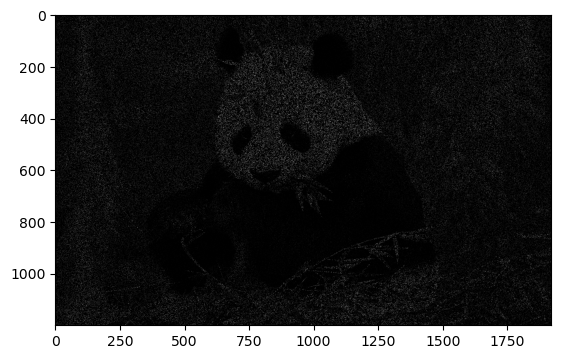

In [4]:
from numpy import random

def masking(img, percentage):
    indices = random.choice(img.shape[0], size=int(img.shape[0]*percentage), replace=False, p=None)
    b = np.zeros((H,W)).ravel()
    for ind in indices:
        b[ind] = img[ind]
    return b, indices

percentage = 0.1
b, indices = masking(image.ravel(), percentage)

plt.imshow(b.reshape((H,W)), cmap='gray')
plt.show()

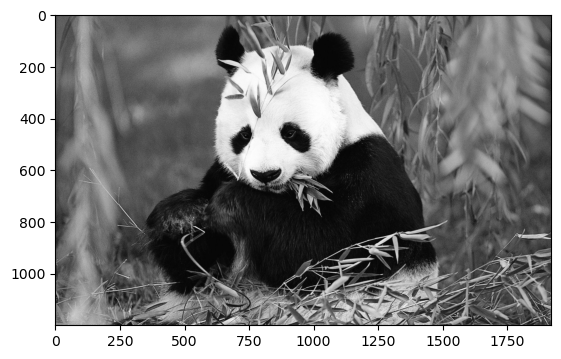

In [6]:
import numpy as np

# Load the input image and the binary mask
# create a small black and white image

# Specify the lambda value and the patch size
lambda_value = 100
patch_size = 7

# Convert the mask array to integer type
mask = np.int_(b.reshape((H,W)))

# Or convert the mask array to boolean type
mask = np.bool_(mask)

# Perform image inpainting using patch-wise NL-means filter
inpainted = inpaint(image, mask, lambda_value, patch_size)

# # Save the inpainted image
# np.save('inpainted.npy', inpainted)
plt.imshow(inpainted, cmap='gray')
plt.show()

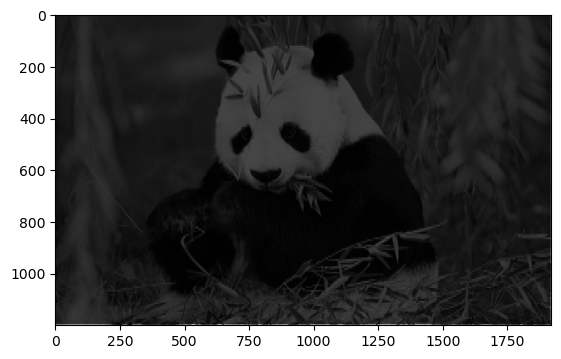

In [7]:
import numpy as np

# Load the input image and the binary mask
# create a small black and white image

# Specify the lambda value and the patch size
lambda_value = 1
patch_size = 7

# Convert the mask array to integer type
mask = np.int_(b.reshape((H,W)))

# Or convert the mask array to boolean type
mask = np.bool_(mask)

# Perform image inpainting using patch-wise NL-means filter
inpainted = inpaint(image, mask, lambda_value, patch_size)

# # Save the inpainted image
# np.save('inpainted.npy', inpainted)
plt.imshow(inpainted, cmap='gray')
plt.show()

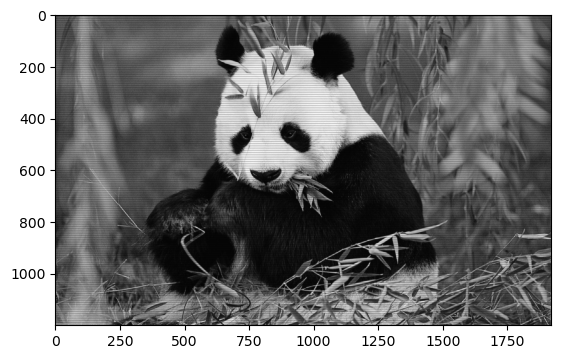

In [8]:
import numpy as np

# Load the input image and the binary mask
# create a small black and white image

# Specify the lambda value and the patch size
lambda_value = 10
patch_size = 7

# Convert the mask array to integer type
mask = np.int_(b.reshape((H,W)))

# Or convert the mask array to boolean type
mask = np.bool_(mask)

# Perform image inpainting using patch-wise NL-means filter
inpainted = inpaint(image, mask, lambda_value, patch_size)

# # Save the inpainted image
# np.save('inpainted.npy', inpainted)
plt.imshow(inpainted, cmap='gray')
plt.show()